In [1]:
import os
import sys

import numpy as np
import pandas as pd
import polars as pl

import matplotlib.pyplot as plt
import seaborn as sns

# Random Seeds
SEED=3093453
np.random.seed(SEED)



# Cosmetics
np.set_printoptions(
    edgeitems=30,
    linewidth=100_000,
    suppress=True
    )

sns.set(
    context="talk",
    style="darkgrid"
)


cwd = os.getcwd()
cwd, _ = os.path.split(cwd)

In [2]:


df = pd.DataFrame(columns = ["Set", "Filename", "raw"])


#for Set in ["A", "B", "C"]:
for Set in ["X", "X-DEBUG"]:
    path = os.path.join(cwd, "data", Set)
    for dirpath, dirnames, filenames in os.walk(path):
        filenames = sorted(filenames)
        for filename in filenames:
            if not filename.endswith(".out"):
                continue
            filepath = os.path.join(dirpath, filename)
            #print(filename)
            with open(filepath, "r") as f:
                raw_text = f.read()
            
            data = pd.DataFrame([[Set, filename[:-4], raw_text]], columns = ["Set", "Filename", "raw"])
            df = pd.concat([df, data])


#df = df[df.Filename.str.contains(r"[A-Z][A-Z]\d?\-\d{1,3}")]

#df = df[df["Filename"].str.len() >3]
df
df["Threshold"] = df["Filename"].str.extract("\-(\d*)").astype(float)

df["Instance"] = df["Filename"].str.split("-").str[0]
df = df.sort_values(["Set", "Filename"]).reset_index(drop=True)

df

,Set,Filename,raw,Threshold,Instance
0,X,AS,"cpu-bind=MASK - cn-0002, task 0 0 [2204321]:...",NaN,AS
1,X,AS-0,"cpu-bind=MASK - cn-0142, task 0 0 [3234793]:...",0.0,AS
2,X,AS-10,"cpu-bind=MASK - cn-0140, task 0 0 [3622505]:...",10.0,AS
3,X,AS-100,"cpu-bind=MASK - cn-0100, task 0 0 [3560115]:...",100.0,AS
4,X,AS-20,"cpu-bind=MASK - cn-0206, task 0 0 [2294212]:...",20.0,AS
...,...,...,...,...,...
2455,X-DEBUG,VA7-80-DEBUG-0,"cpu-bind=MASK - cn-0025, task 0 0 [567699]: ...",80.0,VA7
2456,X-DEBUG,VA7-80-DEBUG-1,"cpu-bind=MASK - cn-0025, task 0 0 [567700]: ...",80.0,VA7
2457,X-DEBUG,VA7-80-DEBUG-1,"cpu-bind=MASK - cn-0025, task 0 0 [567700]: ...",80.0,VA7
2458,X-DEBUG,VA7-80-DEBUG-2,"cpu-bind=MASK - cn-0206, task 0 0 [2362137]:...",80.0,VA7


In [3]:
df = df[(df["Set"] == "X")&(df["Threshold"].isnull()) | (df["Set"] == "X-DEBUG")&(~df["Threshold"].isnull())]
df.head()

,Set,Filename,raw,Threshold,Instance
0,X,AS,"cpu-bind=MASK - cn-0002, task 0 0 [2204321]:...",NaN,AS
12,X,AS2,"cpu-bind=MASK - cn-0256, task 0 0 [978147]: ...",NaN,AS2
24,X,AS3,"cpu-bind=MASK - cn-0214, task 0 0 [2414625]:...",NaN,AS3
36,X,AS4,"cpu-bind=MASK - cn-0245, task 0 0 [3948989]:...",NaN,AS4
48,X,AS5,"cpu-bind=MASK - cn-0202, task 0 0 [588995]: ...",NaN,AS5


In [4]:
df["finalObjective"] = df.raw.str.extract("Final Solution\nObjective;(\d*\.?\d?)\nTransportation cost;").astype(float)
df["finalTransportationCost"] = df.raw.str.extract("Final Solution\nObjective;\d*\.?\d?\nTransportation cost;(\d*\.?\d?)").astype(float)
df["finalInventoryCost"] = df.raw.str.extract(
    "Final Solution\nObjective;\d*\.?\d?\nTransportation cost;\d*\.?\d?\nInventory cost;(\d*\.?\d?)"
).astype(float)
df["Runtime"] = df.raw.str.extract(
    "Final Solution\nObjective;\d*\.?\d?\nTransportation cost;\d*\.?\d?\nInventory cost;\d*\.?\d?\nRuntime;(\d*\.?\d?)"
).astype(float)
#df["finalObjective"].hist()

/var/folders/j4/qmf6qmvd1gv0nctgx3m6jm3r0000gn/T/ipykernel_80067/505975397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["finalObjective"] = df.raw.str.extract("Final Solution\nObjective;(\d*\.?\d?)\nTransportation cost;").astype(float)
/var/folders/j4/qmf6qmvd1gv0nctgx3m6jm3r0000gn/T/ipykernel_80067/505975397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["finalTransportationCost"] = df.raw.str.extract("Final Solution\nObjective;\d*\.?\d?\nTransportation cost;(\d*\.?\d?)").astype(float)
/v

In [5]:
num_LNS_iterations = df["raw"].str.extractall(r"LNS iteration (\d*)").astype(int).reset_index().groupby("level_0")[0].max()

In [6]:
num_LNS_iterations = df["raw"].str.extractall(r"LNS iteration (\d*)").astype(int).reset_index().groupby("level_0")[0].max()
#num_LNS_iterations.index.name=
num_LNS_iterations.name = "num_LNS_iter"
df = df.join(num_LNS_iterations)
df["num_LNS_iter"] = df["num_LNS_iter"].fillna(0).astype(int)

In [7]:
df.head()

,Set,Filename,raw,Threshold,Instance,finalObjective,finalTransportationCost,finalInventoryCost,Runtime,num_LNS_iter
0,X,AS,"cpu-bind=MASK - cn-0002, task 0 0 [2204321]:...",NaN,AS,2017343.0,1942200.0,75143.0,3590.9,3
12,X,AS2,"cpu-bind=MASK - cn-0256, task 0 0 [978147]: ...",NaN,AS2,2173535.0,2043600.0,129935.0,3595.7,3
24,X,AS3,"cpu-bind=MASK - cn-0214, task 0 0 [2414625]:...",NaN,AS3,9809539.0,9706500.0,103039.0,3597.4,3
36,X,AS4,"cpu-bind=MASK - cn-0245, task 0 0 [3948989]:...",NaN,AS4,2048455.0,1975500.0,72955.0,3596.1,3
48,X,AS5,"cpu-bind=MASK - cn-0202, task 0 0 [588995]: ...",NaN,AS5,2217620.0,2084700.0,132920.0,3594.9,3


In [8]:
reference_df = df[df.Threshold.isnull()].copy()
df = df[~df.Threshold.isnull()].copy().reset_index(drop=True)
df["Threshold"] = df["Threshold"].astype(int)
df.head()

,Set,Filename,raw,Threshold,Instance,finalObjective,finalTransportationCost,finalInventoryCost,Runtime,num_LNS_iter
0,X-DEBUG,AS4-0-DEBUG,"cpu-bind=MASK - cn-0210, task 0 0 [930141]: ...",0,AS4,2369198.0,2296800.0,72398.0,3595.7,1
1,X-DEBUG,AS4-0-DEBUG,"cpu-bind=MASK - cn-0210, task 0 0 [930141]: ...",0,AS4,2369198.0,2296800.0,72398.0,3595.7,1
2,X-DEBUG,AS4-10-DEBUG,"cpu-bind=MASK - cn-0211, task 0 0 [490089]: ...",10,AS4,2114382.0,2042100.0,72282.0,3596.2,2
3,X-DEBUG,AS4-10-DEBUG,"cpu-bind=MASK - cn-0211, task 0 0 [490089]: ...",10,AS4,2114382.0,2042100.0,72282.0,3596.2,2
4,X-DEBUG,AS4-100-DEBUG,"cpu-bind=MASK - cn-0220, task 0 0 [3337837]:...",100,AS4,1957306.0,1883400.0,73906.0,2672.3,13


In [9]:
print(reference_df[reference_df.Instance == "TA4"]["raw"].item())

cpu-bind=MASK - cn-0128, task  0  0 [3792918]: mask |--------------------||||--------BBBBBBBB----|  set
Python 3.10.6
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (linux64)
Copyright (c) 2022, Gurobi Optimization, LLC
started at Sun Jan 14 16:13:55 CET 2024
####################################################################################################
####################################################################################################
Start ROADEF
Set parameter TokenServer to value "license3.uni-paderborn.de"
Solve instance TA4 with a warm start and tight groups.
####################################################################################################
####################################################################################################
Time for optimization 3600.0 (s)
####################################################################################################
Data read
Took 	00:00:00.839
########################################

In [10]:
df = df.merge(
    reference_df[["Set", "Instance", "finalTransportationCost", "finalInventoryCost", "finalObjective", "Runtime", "num_LNS_iter"]],
    how="left",
    on=[#"Set",
        "Instance"],
    suffixes=("", "_Reference"),
    
)
df.head()

,Set,Filename,raw,Threshold,Instance,finalObjective,finalTransportationCost,finalInventoryCost,Runtime,num_LNS_iter,Set_Reference,finalTransportationCost_Reference,finalInventoryCost_Reference,finalObjective_Reference,Runtime_Reference,num_LNS_iter_Reference
0,X-DEBUG,AS4-0-DEBUG,"cpu-bind=MASK - cn-0210, task 0 0 [930141]: ...",0,AS4,2369198.0,2296800.0,72398.0,3595.7,1,X,1975500.0,72955.0,2048455.0,3596.1,3
1,X-DEBUG,AS4-0-DEBUG,"cpu-bind=MASK - cn-0210, task 0 0 [930141]: ...",0,AS4,2369198.0,2296800.0,72398.0,3595.7,1,X,1975500.0,72955.0,2048455.0,3596.1,3
2,X-DEBUG,AS4-10-DEBUG,"cpu-bind=MASK - cn-0211, task 0 0 [490089]: ...",10,AS4,2114382.0,2042100.0,72282.0,3596.2,2,X,1975500.0,72955.0,2048455.0,3596.1,3
3,X-DEBUG,AS4-10-DEBUG,"cpu-bind=MASK - cn-0211, task 0 0 [490089]: ...",10,AS4,2114382.0,2042100.0,72282.0,3596.2,2,X,1975500.0,72955.0,2048455.0,3596.1,3
4,X-DEBUG,AS4-100-DEBUG,"cpu-bind=MASK - cn-0220, task 0 0 [3337837]:...",100,AS4,1957306.0,1883400.0,73906.0,2672.3,13,X,1975500.0,72955.0,2048455.0,3596.1,3


In [11]:
df["Subset"] = "Training"
df.loc[(df.Set.str.contains("X")) & (df.Instance.str.endswith("4") | df.Instance.str.endswith("5")), "Subset"] = "Validation"
df.loc[(df.Set.str.contains("X")) & (df.Instance.str.endswith("6") | df.Instance.str.endswith("7")), "Subset"] = "Testing"

In [12]:
df = df[(df["Subset"] == "Validation")]

In [13]:
clms = df.columns

for clm in clms[clms.str.contains("_Reference")]:
    clm_clean = clm.split("_Reference")[0]
    if df[clm].dtype == "O":
        continue
    df[clm_clean] = df[clm_clean] / df[clm]

df.head()

,Set,Filename,raw,Threshold,Instance,finalObjective,finalTransportationCost,finalInventoryCost,Runtime,num_LNS_iter,Set_Reference,finalTransportationCost_Reference,finalInventoryCost_Reference,finalObjective_Reference,Runtime_Reference,num_LNS_iter_Reference,Subset
0,X-DEBUG,AS4-0-DEBUG,"cpu-bind=MASK - cn-0210, task 0 0 [930141]: ...",0,AS4,1.156578,1.162642,0.992365,0.999889,0.333333,X,1975500.0,72955.0,2048455.0,3596.1,3,Validation
1,X-DEBUG,AS4-0-DEBUG,"cpu-bind=MASK - cn-0210, task 0 0 [930141]: ...",0,AS4,1.156578,1.162642,0.992365,0.999889,0.333333,X,1975500.0,72955.0,2048455.0,3596.1,3,Validation
2,X-DEBUG,AS4-10-DEBUG,"cpu-bind=MASK - cn-0211, task 0 0 [490089]: ...",10,AS4,1.032184,1.033713,0.990775,1.000028,0.666667,X,1975500.0,72955.0,2048455.0,3596.1,3,Validation
3,X-DEBUG,AS4-10-DEBUG,"cpu-bind=MASK - cn-0211, task 0 0 [490089]: ...",10,AS4,1.032184,1.033713,0.990775,1.000028,0.666667,X,1975500.0,72955.0,2048455.0,3596.1,3,Validation
4,X-DEBUG,AS4-100-DEBUG,"cpu-bind=MASK - cn-0220, task 0 0 [3337837]:...",100,AS4,0.955504,0.953379,1.013035,0.743111,4.333333,X,1975500.0,72955.0,2048455.0,3596.1,3,Validation


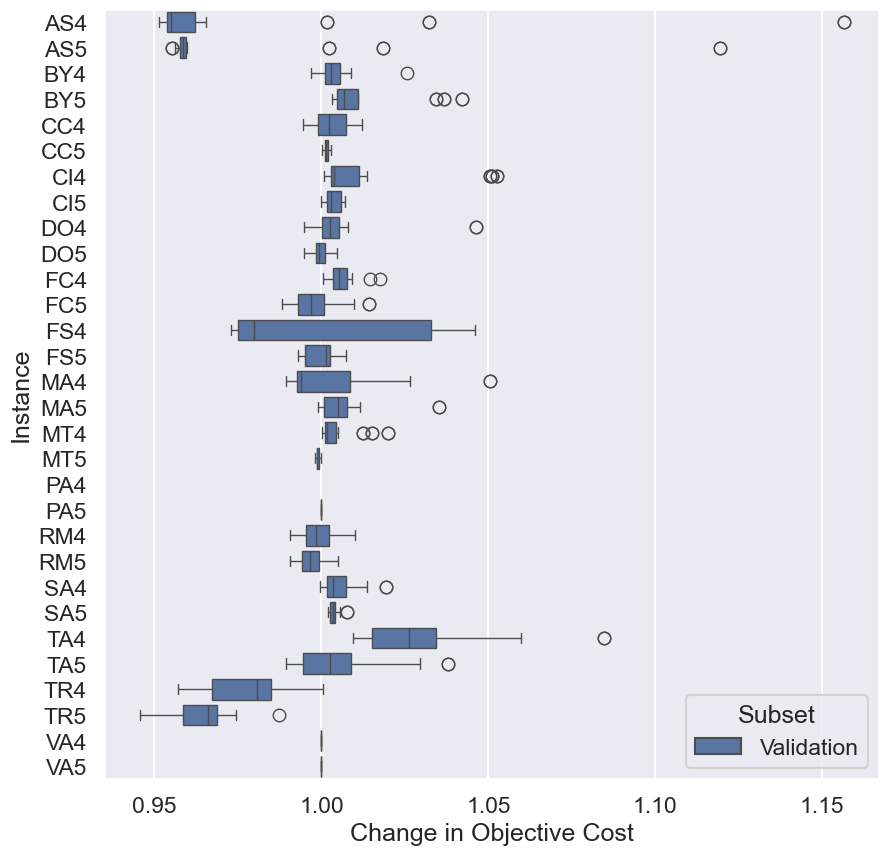

In [14]:
plt.figure(figsize=(10, 10))
#sns.boxplot(data=df, y="Instance", x="finalObjective", hue="Set");
sns.boxplot(data=df, y="Instance", x="finalObjective", hue="Subset");
plt.xlabel("Change in Objective Cost");

In [15]:
df["finalObjective"].isnull().mean()
df["finalObjective"].isnull().sum()

31

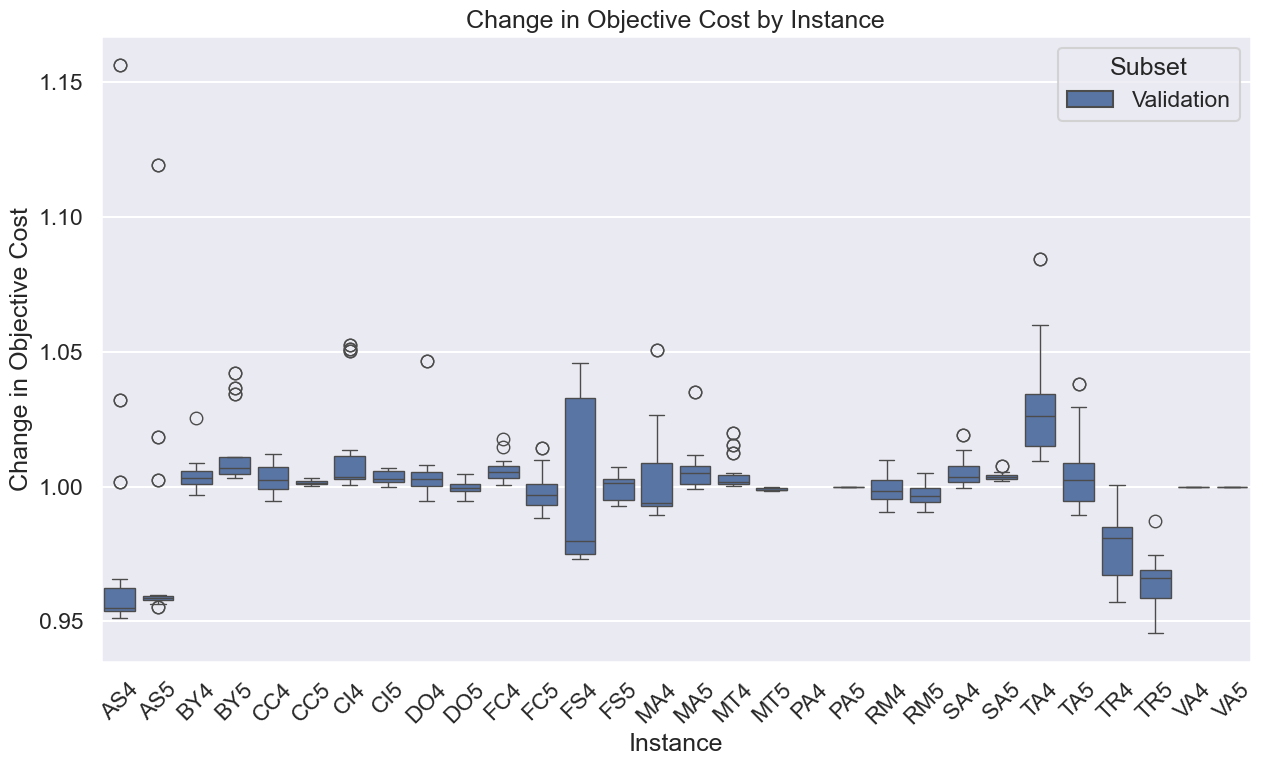

In [16]:
plt.figure(figsize=(13, 8))
#sns.boxplot(data=df, y="Instance", x="finalObjective", hue="Set");
sns.boxplot(data=df, x="Instance", y="finalObjective", hue="Subset");
plt.ylabel("Change in Objective Cost");
plt.title("Change in Objective Cost by Instance");
plt.xticks(rotation=45);

plt.tight_layout()
for file_format in ["pdf"]:
    path = os.path.join(cwd, "plots", "2024-04-12-ExperimentsThreshold-DEBUG", f"Change in Objective by Instance.{file_format}")
    plt.savefig(path)


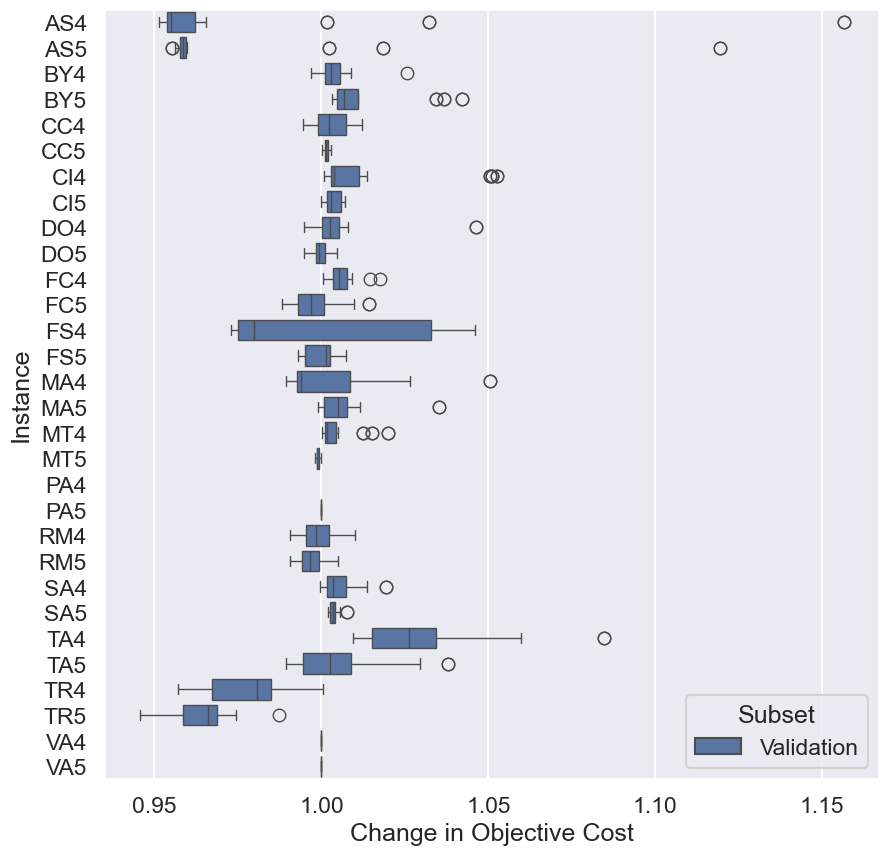

In [17]:
plt.figure(figsize=(10, 10))
#sns.boxplot(data=df, y="Instance", x="finalObjective", hue="Set");
sns.boxplot(data=df, y="Instance", x="finalObjective", hue="Subset");
plt.xlabel("Change in Objective Cost");

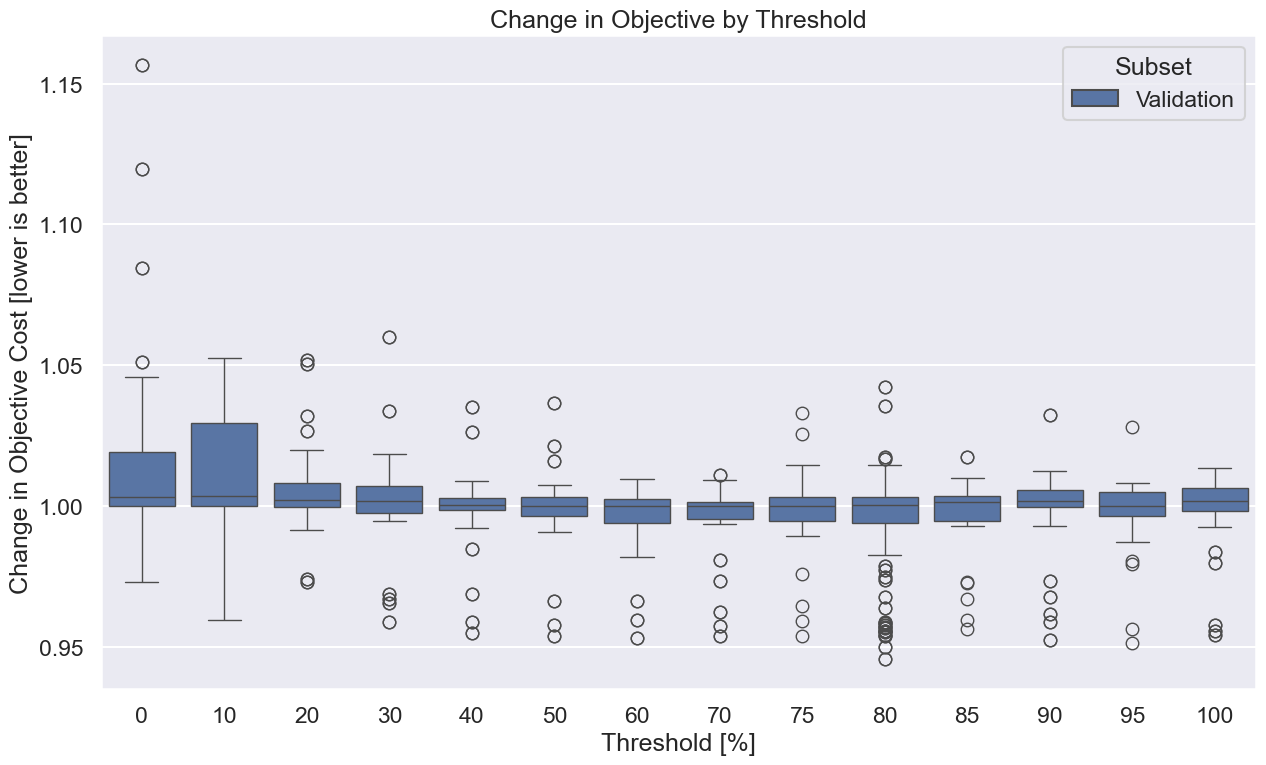

In [18]:
plt.figure(figsize=(13, 8))
sns.boxplot(data=df, y="finalObjective", x="Threshold", hue="Subset");
plt.xlabel("Threshold [%]")
plt.ylabel("Change in Objective Cost [lower is better]");
plt.title("Change in Objective by Threshold")

plt.tight_layout()
for file_format in ["pdf"]:
    path = os.path.join(cwd, "plots", "2024-04-12-ExperimentsThreshold-DEBUG", f"Change in Objective by Threshold.{file_format}")
    plt.savefig(path)


In [19]:
df.groupby("Threshold")[["finalObjective"]].agg(["mean", "std", "count"])

finalObjective                
                    mean       std count
Threshold                               
0               1.019914  0.039171    58
10              1.010462  0.021607    58
20              1.005809  0.017235    58
30              1.001227  0.019421    58
40              0.998385  0.015858    58
50              0.998145  0.016105    58
60              0.995646  0.013641    58
70              0.994613  0.014475    58
75              0.997450  0.016680    29
80              0.995474  0.016911   232
85              0.996616  0.015633    29
90              0.996985  0.017380    58
95              0.997223  0.014951    29
100             0.997117  0.015856    58

In [20]:
from scipy.stats import norm, t

t_value = (0.995017-1) /(0.017117/29**0.5)
print(t_value)

t.cdf(t_value, df=29-1)

-1.5676973905445473


0.06409250666448368

In [21]:
x = df.finalObjective[df.Threshold == 90]
x = x[~x.isnull()]

t_value = (1-x.mean()) / x.std() * len(x)**0.5
t_value

1.3212595310053121

In [22]:
from scipy.stats import t

t.pdf(t_value, df=len(x)-1)

0.16560141088909966

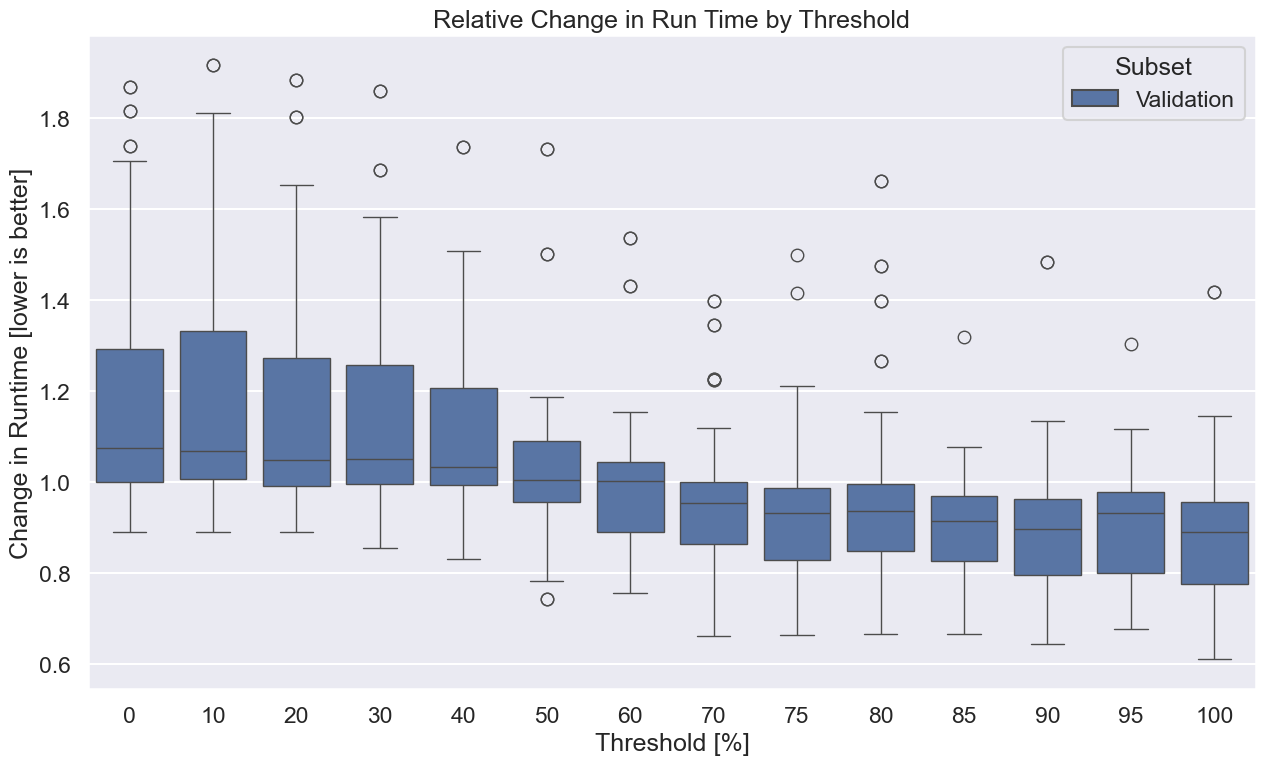

In [23]:
plt.figure(figsize=(13, 8))
sns.boxplot(data=df, y="Runtime", x="Threshold", hue="Subset");
plt.xlabel("Threshold [%]")
plt.ylabel("Change in Runtime [lower is better]");
plt.title("Relative Change in Run Time by Threshold")


plt.tight_layout()
for file_format in ["pdf"]:
    path = os.path.join(cwd, "plots", "2024-04-12-ExperimentsThreshold-DEBUG", f"Change in Runtime by Threshold VALIDATION.{file_format}")
    plt.savefig(path)

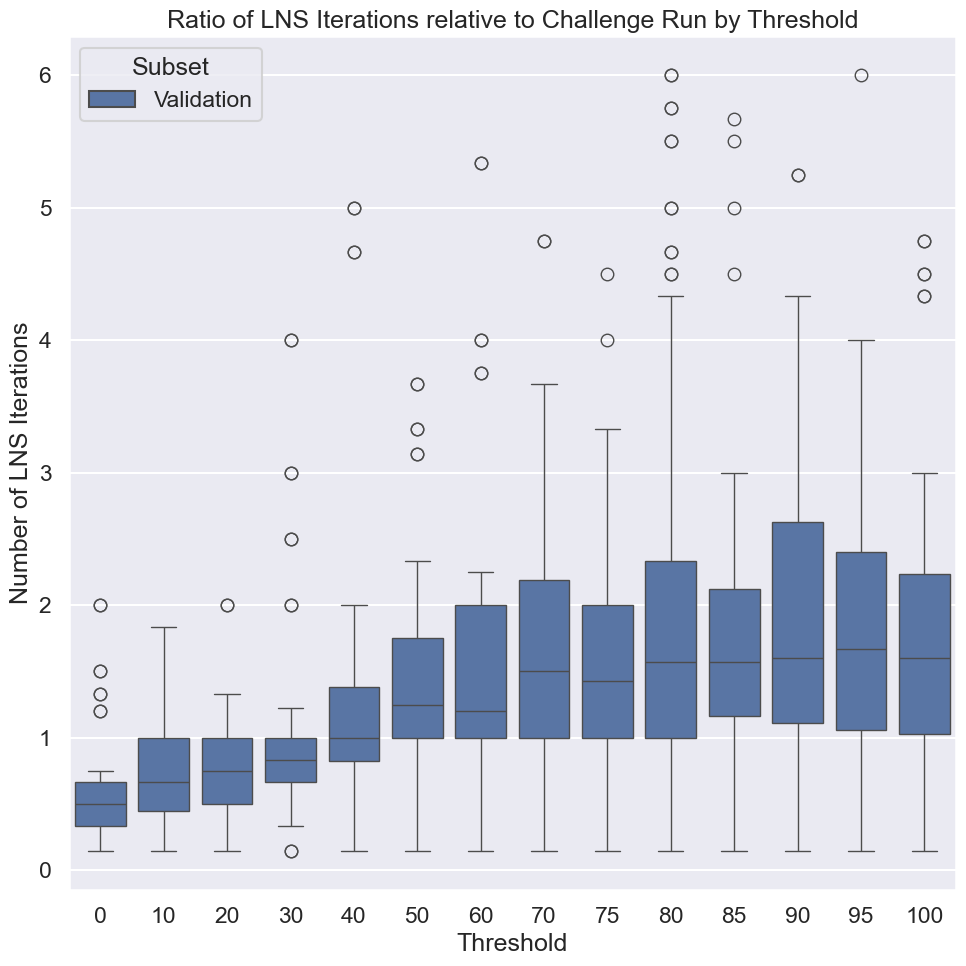

In [24]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df, y="num_LNS_iter", x="Threshold", hue="Subset");
plt.ylabel("Number of LNS Iterations");
plt.title("Ratio of LNS Iterations relative to Challenge Run by Threshold");
plt.tight_layout()

In [25]:
reference_df[(reference_df.Set == "A")&(reference_df.Instance == "BU")]

,Set,Filename,raw,Threshold,Instance,finalObjective,finalTransportationCost,finalInventoryCost,Runtime,num_LNS_iter


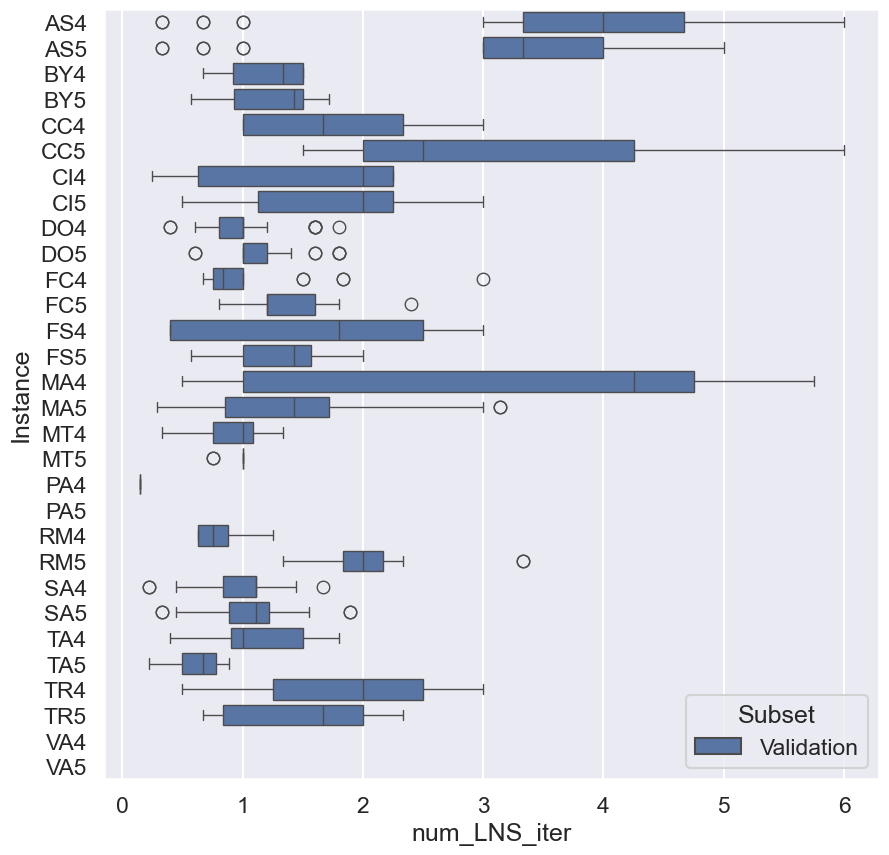

In [26]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df, y="Instance", x="num_LNS_iter", hue="Subset");
#plt.ylabel("Change in Runtime");

## Crosstable Model / Area

In [27]:
idx = df[(df.Instance == "TA4")& (df.Threshold==80)]#.index.item()
idx

,Set,Filename,raw,Threshold,Instance,finalObjective,finalTransportationCost,finalInventoryCost,Runtime,num_LNS_iter,Set_Reference,finalTransportationCost_Reference,finalInventoryCost_Reference,finalObjective_Reference,Runtime_Reference,num_LNS_iter_Reference,Subset
907,X-DEBUG,TA4-80-DEBUG,"cpu-bind=MASK - cn-0248, task 0 0 [2703501]:...",80,TA4,1.035356,1.036381,0.933615,1.007367,1.8,X,964800.0,9716.0,974516.0,2986.4,5,Validation
908,X-DEBUG,TA4-80-DEBUG,"cpu-bind=MASK - cn-0248, task 0 0 [2703501]:...",80,TA4,1.035356,1.036381,0.933615,1.007367,1.8,X,964800.0,9716.0,974516.0,2986.4,5,Validation
909,X-DEBUG,TA4-80-DEBUG-0,"cpu-bind=MASK - cn-0247, task 0 0 [3611337]:...",80,TA4,1.016715,1.016791,1.009160,1.081335,1.0,X,964800.0,9716.0,974516.0,2986.4,5,Validation
910,X-DEBUG,TA4-80-DEBUG-0,"cpu-bind=MASK - cn-0247, task 0 0 [3611337]:...",80,TA4,1.016715,1.016791,1.009160,1.081335,1.0,X,964800.0,9716.0,974516.0,2986.4,5,Validation
911,X-DEBUG,TA4-80-DEBUG-1,"cpu-bind=MASK - cn-0248, task 0 0 [2797697]:...",80,TA4,1.010797,1.010572,1.033141,1.006697,1.8,X,964800.0,9716.0,974516.0,2986.4,5,Validation
912,X-DEBUG,TA4-80-DEBUG-1,"cpu-bind=MASK - cn-0248, task 0 0 [2797697]:...",80,TA4,1.010797,1.010572,1.033141,1.006697,1.8,X,964800.0,9716.0,974516.0,2986.4,5,Validation
913,X-DEBUG,TA4-80-DEBUG-2,"cpu-bind=MASK - cn-0248, task 0 0 [2797696]:...",80,TA4,1.017370,1.018346,0.920441,0.911566,1.0,X,964800.0,9716.0,974516.0,2986.4,5,Validation
914,X-DEBUG,TA4-80-DEBUG-2,"cpu-bind=MASK - cn-0248, task 0 0 [2797696]:...",80,TA4,1.017370,1.018346,0.920441,0.911566,1.0,X,964800.0,9716.0,974516.0,2986.4,5,Validation


In [47]:
import polars as pl

(
    pl.DataFrame({"index": [0, 1, 2, 2, 3,3,3],
                  "clm": np.arange(7)
                 })
    .group_by(["index"], maintain_order=True)
    .agg(pl.count("clm").alias("abc")> 2 ) 
)#[0, "clm"]

index,abc
i64,bool
0,false
1,false
2,false
3,true


In [28]:
tab = (
    df["raw"]
    .str.extractall("Model Prediction: (\d\.\d*)-Neuer Approach: .*?\n-Packed Area\s*:(\d\.\d*)-Alter Approach:")
    .astype(float)
    .reset_index()
    .drop("match", axis=1)
    .rename({
        "level_0": "Instance",
        0: "Prediction",
        1: "AreaRatio",
    },axis=1)
)
tab.head()

,Instance,Prediction,AreaRatio
0,0,0.211144,0.848416
1,0,0.167363,0.674699
2,0,0.249293,0.832236
3,0,0.419581,0.845839
4,0,0.202688,0.847648


In [29]:
sub_tab = tab.loc[tab.Instance == idx]

fig, ax = plt.subplots(2, figsize=(10, 10))

sns.histplot(data=sub_tab, x="Prediction", bins=np.arange(-0.1, 1.1, 0.05),ax=ax[0]);
sns.histplot(data=sub_tab, x="AreaRatio", bins=np.arange(-0.1, 1.1, 0.05),ax=ax[1]);

ax[0].set(ylabel="Prediction", xlim=[0, 1])
ax[1].set(ylabel="AreaRation", xlim=[0, 1]);

plt.tight_layout()
for file_format in ["pdf"]:
    path = os.path.join(cwd, "plots", "2024-04-12-ExperimentsThreshold-DEBUG", f"TA4-Prediction+AreaRatio.{file_format}")
    plt.savefig(path)
    pass

ValueError: Operands are not aligned. Do `left, right = left.align(right, axis=1, copy=False)` before operating.

In [ ]:
sns.scatterplot(data=sub_tab, x="AreaRatio", y="Prediction", alpha=0.5);

In [ ]:
crosstab = pd.crosstab((sub_tab["Prediction"] > 0.8), (sub_tab["AreaRatio"] < .9))
crosstab[True] = 0
crosstab

In [ ]:
crosstab = pd.crosstab((tab["Prediction"] > 0.8), (tab["AreaRatio"] < .9), normalize=True)
(crosstab*100).round(1)

In [ ]:
stacks = df["raw"].str.extractall("\nStack (\d*) with items:")\
    .reset_index()\
    .set_index("level_0")\
    .astype({0: int})
stacks

In [ ]:
stack_counts = stacks[0].value_counts().sort_index(ascending=True).diff(-1)

#plt.bar(stack_counts.index, stack_counts);
stack_counts#.index.max()

In [ ]:
prediction_times = (
    df["raw"]
    .str.extractall("Time spent for prediction: (\d\.\d*) for Batch of (\d*) truck plans")
    .reset_index()
    .rename({"level_0": "Instance",
             "match": "LNS-Iteration",
             0: "InferenceTime",
             1: "numTrucks"},
            axis=1)
    .astype({"InferenceTime": float,
             "numTrucks": int})
)

TA4_index = df[df.Instance=="TA4"].index

prediction_times[ np.isin(prediction_times.Instance, TA4_index)]

sns.regplot(
    data = prediction_times[ np.isin(prediction_times.Instance, TA4_index)],
    x = "numTrucks",
    y = "InferenceTime",
    #logx=True
)
plt.xlabel("Number of Trucks")
plt.ylabel("Inference Time [s]");
plt.title("Inference Time by Truck count for Instance X-TA4");

plt.tight_layout()
for file_format in ["pdf"]:
    path = os.path.join(cwd, "plots", "2024-04-12-ExperimentsThreshold-DEBUG", f"TA4-InferenceTime.{file_format}")
    plt.savefig(path)
    pass

In [ ]:
sns.regplot(data=df.loc[TA4_index], x="Threshold", y="finalObjective");
#sns.regplot(data=df.loc[TA4_index], x="Threshold", y="finalTransportationCost");
#sns.regplot(data=df.loc[TA4_index], x="Threshold", y="finalInventoryCost");

plt.xlabel("Threshold [%]")
#plt.ylabel("Inference Time [s]");
plt.title("Final Objective by Threshold for Instance X-TA4");


plt.tight_layout()
for file_format in ["pdf"]:
    path = os.path.join(cwd, "plots", "2024-04-12-ExperimentsThreshold-DEBUG", f"TA4-ObjectiveByThreshold.{file_format}")
    plt.savefig(path)
    pass

In [ ]:
print(df.loc[TA4_index]["raw"][274])

In [ ]:
sns.regplot(data=df.loc[TA4_index], x="Threshold", y="num_LNS_iter");
plt.ylabel("LNS Iterations")
plt.title("Number of LNS Iterations by Threshold\ncompared to TA4 (5 Iterations)")

plt.tight_layout()
for file_format in ["pdf"]:
    path = os.path.join(cwd, "plots", "2024-04-12-ExperimentsThreshold-DEBUG", f"TA4-LNS_IterByThreshold.{file_format}")
    plt.savefig(path)
    pass

In [ ]:
df

### Compare the number of LNS-Iterations

In [ ]:
LNS_iter_times_reference = (
    reference_df[reference_df.Instance == "TA4"]["raw"]
    .str.extractall("numTrucksRepack:\s*\d*\nRemaining Time:\s*(\d*\.\d*)")
    .astype(float)
    .diff(-1)
)
LNS_iter_times_reference

In [ ]:
LNS_iter_times = (
    df[df.Instance == "TA4"]["raw"]
    .str.extractall("numTrucksRepack:\s*\d*\nRemaining Time:\s*(\d*\.\d*)")
    .astype(float)
    .diff(-1)
)
LNS_iter_times[LNS_iter_times[0]<0] = np.nan
LNS_iter_times.head(7)

In [ ]:

#LNS_iter_times_reference[LNS_iter_times_reference[0]<0] = np.nan

fig, ax = plt.subplots(figsize=(13, 8))
LNS_iter_times.hist(ax=ax, bins=np.arange(0, 750, 50))
LNS_iter_times_reference.hist(ax=ax, bins=np.arange(0, 750, 50))

In [ ]:
LNS_iter_times_reference

In [ ]:
#LNS_iter_times = LNS_iter_times.dropna().reset_index().set_index("level_0").merge(df[["Threshold"]], left_index=True, right_index=True)

LNS_iter_times.groupby("match")[[0]].mean()

In [ ]:
LNS_iter_times[LNS_iter_times.Threshold > 50]

In [ ]:
prediction_times.groupby("Instance")["LNS-Iteration"].max().hist(bins=np.arange(0, 22, 1)-0.5);
plt.xlabel("Number of LNS-Iterations");

In [ ]:
print(df["raw"][0])